<a href="https://colab.research.google.com/github/areegtarek/Speed-Dating-Match-Prediction/blob/main/Speed_Dating_Match_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CISC-873-DM-W23-A2**
# **Speed Dating Match Prediction**
Whether a first date will lead to a relationship

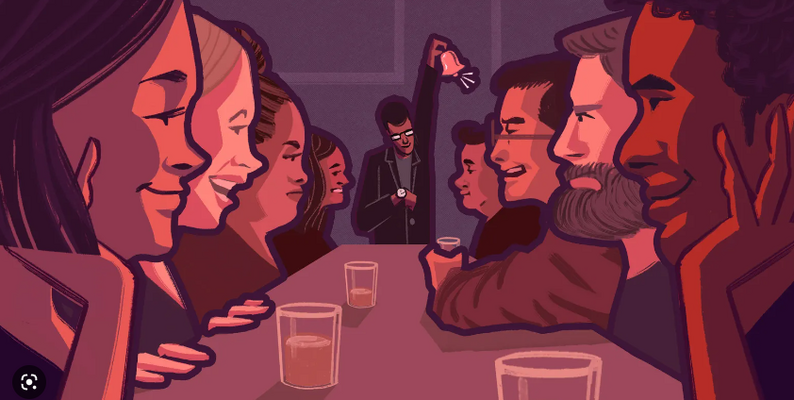

#**General Questions**

**1) Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?**

  - Linear Regression deals with continuous values whereas classification problems mandate discrete values. 



**2) What's a decision tree and how it is different to a logistic regression model?**

* Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two.

**3) What's the difference between grid search and random search?**


* Grid search is a process that searches exhaustively through a manually specified subset of the hyperparameter space of the targeted algorithm. 
* Random search, on the other hand, selects a value for each hyperparameter independently using a probability distribution.

**4) What's the difference between bayesian search and random search?**

* Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. By prioritizing hyperparameters that appear more promising from past results, Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search.

* Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted.

#**Problem Questions**

✔️ Problem Formulation:

* This is a binary classification task. Containing a tabular dataset called ("Speed Dating Match Prediction") and the excepected goal from it to predict the outcome of a specific speed dating session based on the profile of two people.

* It has 192 features as input (information about the dating session) and as output, we are going to predict the probability (0-1, float) that the dating session will lead to a successful match.

* The data mining function that we need in this problems is binary classification and predictions models for output.

* The challenges are that the dataset is clean, but has a lot of missing values. The strategy for missing value replacement has to be tuned. And choosing the best feature selection method for selecting the appropriate features. As well as, this dataset is highly unbalanced (mostly unmatched). 

* The impact of the product on real life help making better match people in speed dating events. Because it is normal for a person to try more than one date until he finds a suitable partner so it quick this process by providing better matching.

* The life cycle of data mining model to be able to predict the probability of successful match is divided to several steps: 

    - Problem understanding
    
    - Data collection.

    - Data preparation.

    - Modeling. 

    - Evaluation.


What is an ideal solution?

The ideal solution is to make the appropriate preprocessing on the important columns that will be important and positively affect predicting the probability of successful match.

What is the experimental protocol used and how was it carried out? What preprocessing steps are used? 

* The experimental protocol used is (The Cross-validation) because it is usually the preferred method as it gives the model the opportunity to train on multiple train-test splits. This gives a better indication of how well the model will perform on unseen data.

* The general procedure is as follows:

  - Shuffle the dataset randomly.
  - Split the dataset into k groups
  - For each unique group:
        Take the group as a hold out or test data set
        Take the remaining groups as a training data set
        Fit a model on the training set and evaluate it on the test set
        Retain the evaluation score and discard the model
  - Summarize the skill of the model using the sample of model evaluation scores
 
* Preprocessing steps that I need:

1) Handling missing values.

2) Handling numerical features.

3) Handling catigorical features.

4) Scaling and Normlization data.

#**import libraries**

In [1]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 1.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, PredefinedSplit, KFold
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay 
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**import data**

In [4]:
# read the train csv file 
path= '/content/drive/MyDrive/Data Mining&DL/Speed-Dating-Match-Prediction-main/train.csv'
df= pd.read_csv(path)

In [5]:
#drop id column as it is unique for every data point and doesnot affect our classification
df.drop(['id'],axis=1,inplace=True)
df.shape

(5909, 191)

# **Exploratory Data Analysis(EDA)**

### Quick Exploration

In [6]:
# display the first 5 rows of data
df.head()

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0       0    3       2    14     18         2       2.0     14       12   
1       1   14       1     3     10         2       NaN      8        8   
2       1   14       1    13     10         8       8.0     10       10   
3       1   38       2     9     20        18      13.0      6        7   
4       1   24       2    14     20         6       6.0     20       17   

     pid  ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0  372.0  ...      NaN      NaN       NaN     NaN     NaN      NaN      NaN   
1   63.0  ...      6.0      8.0       8.0     7.0     8.0      NaN      NaN   
2  331.0  ...      NaN      NaN       NaN     NaN     NaN      NaN      NaN   
3  200.0  ...      8.0      9.0       8.0     8.0     6.0      NaN      NaN   
4  357.0  ...      NaN      NaN       NaN     NaN     NaN      NaN      NaN   

   intel5_3  fun5_3  amb5_3  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2       NaN     NaN     NaN  
3       NaN     NaN     NaN  
4       NaN     NaN     NaN  

[5 rows x 191 columns]

In [7]:
# shape of data
df.shape

(5909, 191)

In [8]:
#Names of all the columns in dataset
df.columns

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=191)

In [9]:
# Calculate count, mean, std, min, 25%, 50%, 75%, max values for each column (statistical summary). 
df.describe().T

count       mean        std  min   25%   50%   75%   max
gender    5909.0   0.505331   0.500014  0.0   0.0   1.0   1.0   1.0
idg       5909.0  17.360298  10.947542  1.0   8.0  16.0  26.0  44.0
condtn    5909.0   1.824843   0.380133  1.0   2.0   2.0   2.0   2.0
wave      5909.0  11.347436   6.011495  1.0   7.0  11.0  15.0  21.0
round     5909.0  16.850228   4.389246  5.0  14.0  18.0  20.0  22.0
...          ...        ...        ...  ...   ...   ...   ...   ...
attr5_3   1413.0   6.799717   1.535768  2.0   6.0   7.0   8.0  10.0
sinc5_3   1413.0   7.631989   1.498024  2.0   7.0   8.0   9.0  10.0
intel5_3  1413.0   7.944798   1.320919  4.0   7.0   8.0   9.0  10.0
fun5_3    1413.0   7.162774   1.687431  1.0   6.0   7.0   8.0  10.0
amb5_3    1413.0   7.092711   1.713729  1.0   6.0   7.0   8.0  10.0

[183 rows x 8 columns]

In [10]:
# data info (id,name,count,dtype of each feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 191 entries, gender to amb5_3
dtypes: float64(173), int64(10), object(8)
memory usage: 8.6+ MB


*Check the features which are highly correlated*

In [11]:
# display the correlation between the features 
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [12]:
# display the number of unique values for each column   
df.nunique()

gender       2
idg         44
condtn       2
wave        21
round       15
            ..
attr5_3      9
sinc5_3      9
intel5_3     7
fun5_3      10
amb5_3       9
Length: 191, dtype: int64

In [13]:
# columns that contain one unique value
df.columns[df.nunique()==1].tolist()

[]

**Observation:** There are no columns that contain one unique value

In [14]:
#Count the number of null values in each column
df.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
attr5_3     4496
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
Length: 191, dtype: int64

In [15]:
# display column names that contain NaN values
df.columns[df.isna().any()].tolist()

['positin1',
 'pid',
 'int_corr',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'attr',
 'sinc',
 'intel',
 'fun',
 'a

**Observation:** The list of above columns contain missing values

In [16]:
#display the length of column names that contain NaN values
len(df.columns[df.isna().any()].tolist())

181

**Observation:** There are 181 columns that contain missing values

In [17]:
#check duplicated values
df.duplicated().sum()

0

**Observation:** There is no duplicated data 

#**Data Visualization**

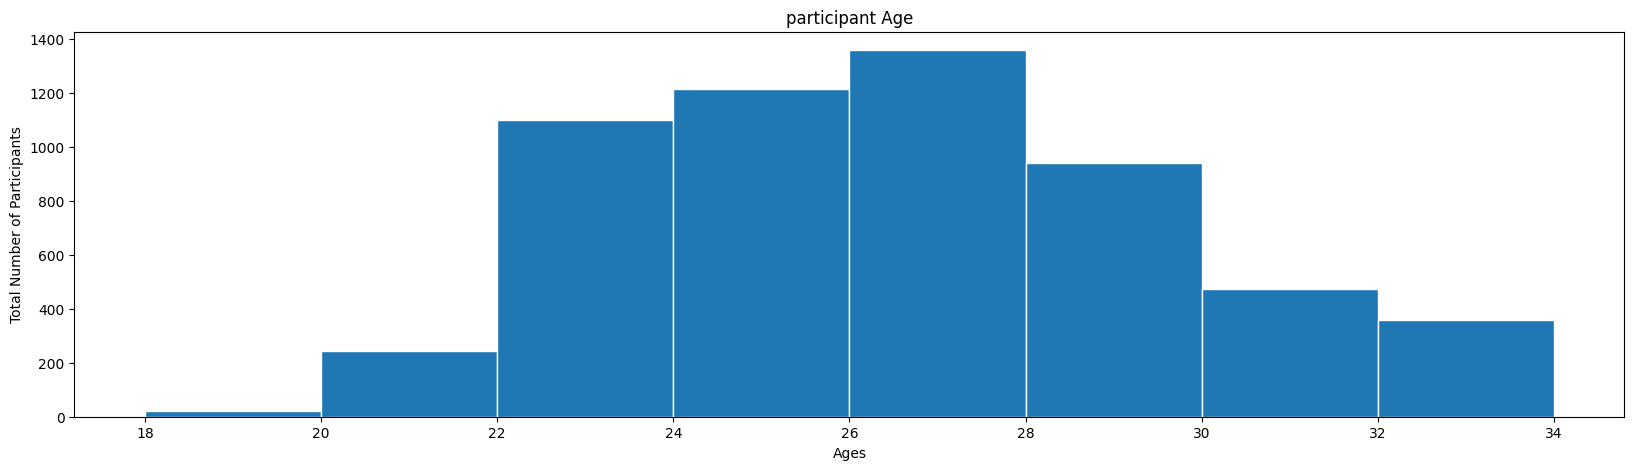

In [18]:
#create a figure object and set its size 
plt.figure(figsize=(20, 5))

#add plot title
plt.title('participant Age')

#add labels for the x and y axis
plt.xlabel('Ages')
plt.ylabel('Total Number of Participants')

#set bin interval
bins = [18,20,22,24,26,28,30,32,34]

#plot
plt.hist(df['age'],bins=bins,edgecolor='white')
plt.show()

**Observation:** The most number of participants' age is from **26:28**

In [19]:
#display the output value counts for each unique value
df['match'].value_counts()

0    4921
1     988
Name: match, dtype: int64

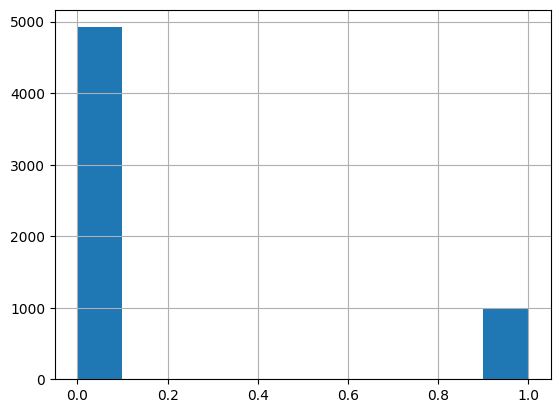

In [20]:
#distribution of the output 
df['match'].hist();

**Observation:** it seems that there is an unblanced data; because of the skwed distribution that resulted in one class became higher than the other class in distribution & this problem can hamper our model accuracy big time. So we should deal with this problem later. 

#**Data Preprocessing**

# Handling Missing Values

In [21]:
#find the percentage & number of missing values for each column 
pd.options.display.max_rows = 1000
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(df))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(df)

missing_values(%)  missing_values(numbers)
num_in_3          92.215265                     5449
numdat_3          82.061262                     4849
expnum            78.304282                     4627
amb7_2            76.476561                     4519
sinc7_2           76.476561                     4519
shar7_2           76.239634                     4505
attr7_2           76.121171                     4498
intel7_2          76.121171                     4498
fun7_2            76.121171                     4498
shar7_3           76.087324                     4496
attr7_3           76.087324                     4496
sinc7_3           76.087324                     4496
intel7_3          76.087324                     4496
fun7_3            76.087324                     4496
amb7_3            76.087324                     4496
amb5_3            76.087324                     4496
shar2_3           76.087324                     4496
intel5_3          76.087324                     4496
attr5_3           76.087324                     4496
fun5_3            76.087324                     4496
sinc5_3           76.087324                     4496
amb2_3            64.951768                     3838
fun2_3            64.951768                     3838
intel2_3          64.951768                     3838
attr4_3           64.951768                     3838
sinc2_3           64.951768                     3838
attr2_3           64.951768                     3838
intel4_3          64.951768                     3838
fun4_3            64.951768                     3838
amb4_3            64.951768                     3838
shar4_3           64.951768                     3838
sinc4_3           64.951768                     3838
mn_sat            62.176341                     3674
tuition           56.947030                     3365
date_3            52.546962                     3105
attr1_3           52.546962                     3105
intel3_3          52.546962                     3105
fun3_3            52.546962                     3105
you_call          52.546962                     3105
them_cal          52.546962                     3105
fun1_3            52.546962                     3105
amb3_3            52.546962                     3105
sinc1_3           52.546962                     3105
intel1_3          52.546962                     3105
amb1_3            52.546962                     3105
shar1_3           52.546962                     3105
sinc3_3           52.546962                     3105
attr3_3           52.546962                     3105
amb3_s            51.937722                     3069
fun3_s            51.937722                     3069
intel3_s          51.937722                     3069
sinc3_s           51.937722                     3069
attr3_s           51.937722                     3069
intel1_s          50.668472                     2994
attr1_s           50.668472                     2994
sinc1_s           50.668472                     2994
shar1_s           50.668472                     2994
amb1_s            50.668472                     2994
fun1_s            50.668472                     2994
income            48.434591                     2862
attr5_2           47.740734                     2821
intel5_2          47.740734                     2821
fun5_2            47.740734                     2821
amb5_2            47.740734                     2821
sinc5_2           47.740734                     2821
intel5_1          41.496023                     2452
attr5_1           41.496023                     2452
sinc5_1           41.496023                     2452
fun5_1            41.496023                     2452
amb5_1            41.496023                     2452
undergra          41.326790                     2442
fun4_2            31.240481                     1846
attr4_2           31.240481                     1846
sinc4_2           31.240481                     1846
intel4_2          31.240481        

In [22]:
#Simple function which we can use directly by passing a dataframe and a threshold

#Remove columns with many missing values
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, axis=1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l

rmissingvaluecol(df,60)

# Columns having more than 60 percent missing values:  33
Columns:
 ['shar2_3', 'numdat_3', 'attr7_3', 'num_in_3', 'shar4_3', 'intel2_3', 'sinc7_3', 'shar7_3', 'mn_sat', 'amb5_3', 'amb4_3', 'amb7_3', 'intel7_2', 'intel5_3', 'sinc7_2', 'sinc4_3', 'intel7_3', 'sinc2_3', 'attr7_2', 'intel4_3', 'attr4_3', 'fun7_3', 'attr2_3', 'fun7_2', 'expnum', 'fun4_3', 'fun5_3', 'amb2_3', 'sinc5_3', 'amb7_2', 'fun2_3', 'shar7_2', 'attr5_3']


['gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 

In [23]:
#create a new dataframe excluding these columns
l = rmissingvaluecol(df, 60)
df = df[l]
print('\n Shape of new data after dropping some columns: ',df.shape)

# Columns having more than 60 percent missing values:  33
Columns:
 ['shar2_3', 'numdat_3', 'attr7_3', 'num_in_3', 'shar4_3', 'intel2_3', 'sinc7_3', 'shar7_3', 'mn_sat', 'amb5_3', 'amb4_3', 'amb7_3', 'intel7_2', 'intel5_3', 'sinc7_2', 'sinc4_3', 'intel7_3', 'sinc2_3', 'attr7_2', 'intel4_3', 'attr4_3', 'fun7_3', 'attr2_3', 'fun7_2', 'expnum', 'fun4_3', 'fun5_3', 'amb2_3', 'sinc5_3', 'amb7_2', 'fun2_3', 'shar7_2', 'attr5_3']

 Shape of new data after dropping some columns:  (5909, 158)


**Observation:** we dropped the features that contain 60% missing values that are equal 33 columns & the remaining number of features is 158

In [24]:
#recheck the percentage & number of missing values for the remaining columns
missing_values(df)

missing_values(%)  missing_values(numbers)
tuition           56.947030                     3365
amb3_3            52.546962                     3105
fun1_3            52.546962                     3105
them_cal          52.546962                     3105
you_call          52.546962                     3105
attr1_3           52.546962                     3105
sinc1_3           52.546962                     3105
intel1_3          52.546962                     3105
date_3            52.546962                     3105
amb1_3            52.546962                     3105
sinc3_3           52.546962                     3105
fun3_3            52.546962                     3105
intel3_3          52.546962                     3105
shar1_3           52.546962                     3105
attr3_3           52.546962                     3105
attr3_s           51.937722                     3069
sinc3_s           51.937722                     3069
intel3_s          51.937722                     3069
amb3_s            51.937722                     3069
fun3_s            51.937722                     3069
shar1_s           50.668472                     2994
amb1_s            50.668472                     2994
fun1_s            50.668472                     2994
sinc1_s           50.668472                     2994
attr1_s           50.668472                     2994
intel1_s          50.668472                     2994
income            48.434591                     2862
attr5_2           47.740734                     2821
sinc5_2           47.740734                     2821
intel5_2          47.740734                     2821
fun5_2            47.740734                     2821
amb5_2            47.740734                     2821
fun5_1            41.496023                     2452
attr5_1           41.496023                     2452
sinc5_1           41.496023                     2452
intel5_1          41.496023                     2452
amb5_1            41.496023                     2452
undergra          41.326790                     2442
fun4_2            31.240481                     1846
intel4_2          31.240481                     1846
sinc4_2           31.240481                     1846
attr4_2           31.240481                     1846
amb4_2            31.240481                     1846
shar4_2           31.240481                     1846
shar2_2           31.240481                     1846
sinc2_2           31.240481                     1846
intel2_2          31.240481                     1846
fun2_2            31.240481                     1846
amb2_2            31.240481                     1846
attr2_2           31.240481                     1846
shar4_1           23.066509                     1363
sinc4_1           22.778812                     1346
intel4_1          22.778812                     1346
fun4_1            22.778812                     1346
amb4_1            22.778812                     1346
attr4_1           22.778812                     1346
positin1          22.304959                     1318
match_es          13.978677                      826
shar_o            13.318666                      787
shar              12.895583                      762
zipcode           12.184803                      720
numdat_2          11.338636                      670
attr1_2           11.135556                      658
sinc1_2           10.949399                      647
intel1_2          10.949399                      647
fun1_2            10.949399                      647
attr3_2           10.949399                      647
satis_2           10.949399                      647
sinc3_2           10.949399                      647
length            10.949399                      647
amb3_2            10.949399                      647
intel3_2          10.949399                      647
amb1_2            10.949399                      647
shar1_2           10.949399                      647
fun3_2            10.949399        

#### Dealing with Categorical Columns

In [25]:
#list of catigorical features
catigorical_cols= list(df.select_dtypes(include=['object']).columns)
catigorical_cols

['field', 'undergra', 'tuition', 'from', 'zipcode', 'income', 'career']

###1) field

In [26]:
#check missing values for the column
df['field'].isnull().sum()

45

In [27]:
#display number of unique values before handilng
df['field'].nunique()

259

In [28]:
#function to handle the field column
def handle_field(df):
  df['field']= df['field'].str.lower()
  #pandas data type 'Object' indicates mixed types rather than str type 
  #So we should uniform the type(string)
  df['field'] = df['field'].astype(str)
  
  #filling the nan value with the most frequent value('business')
  df['field'].replace('nan','business',inplace=True)  #Filling nan values with the mode
  df['field'].replace('business- mba','business (mba)',inplace=True)
  df['field'].replace('creative writing - nonfiction','creative writing (nonfiction)',inplace=True)
  df['field'].replace('electrical engg.','electrical engineering',inplace=True)
  df['field'].replace(['elementary education - preservice','elementary/childhood education (ma)'],'elementary education',inplace=True)
  df['field'].replace('finanace','finance',inplace=True)
  df['field'].replace('finance&economics','finance/economics',inplace=True)
  df['field'].replace('human rights: middle east','human rights',inplace=True)
  df['field'].replace('intrernational affairs','international affairs',inplace=True)
  df['field'].replace('math of finance','mathematical finance',inplace=True)
  df['field'].replace('math','mathematics',inplace=True)
  df['field'].replace(['mba / master of international affairs (sipa)','master of international affairs'],'mba',inplace=True)
  df['field'].replace('nutritiron','nutrition',inplace=True)
  df['field'].replace('operations research (seas)','operations research',inplace=True)
  df['field'].replace(['speech languahe pathology','speech pathology'],'speech language pathology',inplace=True)
  df['field'].replace('stats','statistics',inplace=True)
  df['field'].replace('writing: literary nonfiction','nonfiction writing',inplace=True)
  df['field'].replace('teaching of english','english education',inplace=True)

handle_field(df)

In [29]:
#display the unique values
df['field'].unique()

array(['ed.d. in higher education policy at tc', 'engineering',
       'urban planning', 'international affairs', 'business', 'mba',
       'operations research', 'french', 'nutrition',
       'ma teaching social studies', 'education',
       'electrical engineering', 'sociology', 'law', 'ecology',
       'genetics', 'school psychology', 'human rights',
       'ma in quantitative methods', 'mathematics', 'climate dynamics',
       'finance/economics', 'history',
       'biochemistry & molecular biophysics', 'social work',
       'ma science education', 'film',
       'international security policy - sipa', 'physics', 'medicine',
       'international development', 'climate change',
       'curriculum and teaching/giftedness',
       'master in public administration', 'neurobiology', 'biology',
       'biomedical engineering', 'microbiology', 'mathematics, phd',
       'history of religion',
       'international affairs - economic development',
       'history (gsas - phd)', 'creative 

In [30]:
#display number of unique values 
df['field'].value_counts()

business                                                    481
law                                                         416
mba                                                         354
social work                                                 301
international affairs                                       228
electrical engineering                                      180
psychology                                                  127
sociology                                                   102
finance                                                      95
mathematics                                                  91
education                                                    90
engineering                                                  86
biology                                                      84
medicine                                                     78
film                                                         77
business (mba)                          

In [31]:
#display number of unique values after handilng
df['field'].nunique()

199

In [32]:
#check missing values for the column
df['field'].isnull().sum()

0

###2) career

In [33]:
#check missing values for the column
df['career'].isnull().sum()

64

In [34]:
#display number of unique values before handilng
df['career'].nunique()

367

In [35]:
#function to handle career column
def handle_career(df):
  
  df['career']= df['career'].str.lower()

  #pandas data type 'Object' indicates mixed types rather than str type 
  #So we should uniform the type(string)
  df['career'] = df['career'].astype(str)
  

  df['career'].replace(['?', '??', 'am not sure' , "don't know" , 'dont know yet' , 
                              "i don't know" , 'if only i knew' , 'not sure' , 'not sure yet' ,
                             'not sure yet :)' , 'unsure' , 'unknown' , 'who knows' , 'nan'],'not_sure' ,inplace=True)

  df['career'].replace(['acadeic','academia', 'academia or un','academia, research, banking, life',
                                'academia; research; teaching', 'academic', 'academic (law)', 'academic or consulting',
                                'academic or research staff', 'academic physician','academic research',
                                'academic work, consultant', 'academic/ finance','academician', 'academics',
                                'academics or journalism',],'academic' ,inplace=True)

  df['career'].replace('attorney?','attorney' ,inplace=True)


  df['career'].replace(['banker','banker / academia','banking'] , 'banker' ,inplace=True)


  df['career'].replace(['business','business - investment management','business consulting',
                                'business management','business management and information technology',
                                'business/law'] , 'business' ,inplace=True)


  df['career'].replace(['consultant','consultin \\ management','consulting',
                                'consulting, later arts or non-profit'] , 'consultant' ,inplace=True)


  df['career'].replace(['finance','finance or engineering','finance related','finance/economics',
                                'financial mathematics-investment bank or hedge fund-derivatives quant analyst',
                                'financial service or fashion','financial services',] , 'finance' ,inplace=True)


  df['career'].replace(['teacher', 'teacher and performer','teacher/professor','teaching',
                                'teaching and then...','teaching/education','tech professional'] ,
                              'teacher' ,inplace=True)


  df['career'].replace(['writer','writer/editor', 'writer/journalist','writer/producer',
                                'writer/teacher','writing','writing or editorial'] ,
                              'writer' ,inplace=True)

handle_career(df)

In [36]:
#display the unique values
df['career'].unique()

array(['university president', 'engineer or ibanker or consultant',
       'real estate consulting', 'public service', 'undecided',
       'consultant', 'operations research', 'nutrition and dental',
       'high school social studies teacher', 'educator', 'business',
       'investment banking', 'a research position', 'finance',
       'millionaire', 'teacher', 'law', 'scientific research',
       'international business', 'scientist', 'school psychologist',
       'work at the un', 'engineer', 'not_sure', 'college professor',
       "assistant master of the universe (otherwise it's too much work)",
       'entrepreneur', 'lawyer', 'historian', 'clinical social worker',
       'private equity', 'lawyer/policy work', 'writer', 'attorney',
       'security policy - homeland defense', 'social work', 'researcher',
       'physician', 'development work on field in the middle of nowhere',
       'academic', 'i am a teacher.', 'planning', 'intl development',
       'research', 'pharmaceutica

In [37]:
#display number of unique values 
df['career'].value_counts()

academic                                                              290
professor                                                             249
finance                                                               214
not_sure                                                              206
lawyer                                                                183
writer                                                                180
business                                                              175
consultant                                                            168
teacher                                                               145
law                                                                   129
social worker                                                         111
investment banking                                                    105
banker                                                                 95
scientist                             

In [38]:
#display number of unique values after handilng
df['career'].nunique()

269

In [39]:
#check missing values for the column
df['career'].isnull().sum()

0

###income

In [40]:
#check missing values for the column
df['income'].isnull().sum()

2862

**Observation:** we will fill it with mean later in pipeline.

In [41]:
#display number of unique values before handilng
df['income'].nunique()

261

In [42]:
#display number of unique values 
df['income'].unique()

array([nan, '45,300.00', '46,138.00', '55,080.00', '36,594.00',
       '39,394.00', '16,908.00', '49,642.00', '23,361.00', '46,800.00',
       '40,749.00', '48,944.00', '63,351.00', '75,347.00', '42,640.00',
       '57,513.00', '39,919.00', '32,649.00', '32,508.00', '109,031.00',
       '37,881.00', '37,754.00', '28,989.00', '28,759.00', '45,695.00',
       '64,716.00', '29,809.00', '69,487.00', '32,159.00', '41,191.00',
       '36,782.00', '27,248.00', '61,152.00', '49,409.00', '30,147.00',
       '50,725.00', '50,572.00', '48,785.00', '25,589.00', '50,745.00',
       '52,388.00', '53,229.00', '29,236.00', '55,550.00', '55,138.00',
       '28,891.00', '20,000.00', '12,063.00', '47,005.00', '56,096.00',
       '41,547.00', '31,148.00', '29,279.00', '33,772.00', '37,315.00',
       '35,960.00', '46,272.00', '35,627.00', '52,805.00', '97,972.00',
       '25,831.00', '25,786.00', '46,608.00', '32,386.00', '60,000.00',
       '28,240.00', '16,767.00', '37,994.00', '35,867.00', '43,367.00',

In [43]:
#display number of unique values 
df['income'].value_counts()

55,080.00     82
78,704.00     30
53,229.00     30
49,409.00     28
25,401.00     25
33,772.00     25
80,006.00     22
69,487.00     21
52,010.00     20
16,767.00     20
64,716.00     19
48,944.00     18
25,786.00     18
49,642.00     18
72,412.00     18
62,997.00     18
65,708.00     18
35,187.00     18
61,686.00     18
20,000.00     17
36,673.00     17
55,550.00     17
39,123.00     17
15,863.00     17
66,827.00     17
52,805.00     17
26,706.00     17
39,919.00     17
35,867.00     17
73,073.00     16
47,005.00     16
55,138.00     16
48,137.00     16
51,725.00     16
46,792.00     16
45,300.00     16
53,501.00     16
32,508.00     16
109,031.00    16
41,191.00     16
36,510.00     16
31,809.00     15
53,196.00     15
35,968.00     15
46,153.00     15
26,298.00     15
71,787.00     15
50,572.00     15
58,802.00     15
50,501.00     15
52,804.00     15
62,875.00     14
53,771.00     14
76,624.00     14
41,778.00     14
47,624.00     14
80,608.00     14
18,283.00     14
27,503.00     

In [44]:
def handle_income(df):
  df['income'] = [float(str(i).replace(",", "")) for i in df['income']]

handle_income(df)

**Observation:** income column assigned as object data type(which is mixed between float & string) so we should convert its data type to float as we did in the previous function.

In [45]:
#display the mean; to make sure we correctly converted the data type to float
df['income'].mean()

44904.28782408927

###4) zip code

In [46]:
#check missing values for the column
df['zipcode'].isnull().sum()

720

In [47]:
#display number of unique values before handilng
df['zipcode'].nunique()

409

In [48]:
#display the unique values
df['zipcode'].unique()

array([nan, '2,021', '10,471', '66,208', '10,021', '8,003', '21,701',
       '85,283', '27,701', '395,001', '630,090', '519,000', '8,025',
       '7,032', '11,001', '76,513', '30,345', '7,410', '43,220', '77,546',
       '10,803', '11,023', '2,155', '13,850', '78,110', '11,746',
       '91,730', '10,012', '91,754', '10,514', '98,115', '0', '77,096',
       '87,004', '87,110', '7,605', '80,798', '8,091', '370,138',
       '400,051', '7,624', '7,076', '11,364', '77,024', '19,151',
       '60,521', '7,620', '28,035', '53,705', '84,108', '33,183',
       '29,501', '22,151', '560,032', '10,128', '13,827', '20,852',
       '4,605', '33,418', '60,611', '85,201', '92,075', '77,095',
       '11,572', '92,064', '7,661', '80,220', '78,230', '60,089',
       '11,570', '94,133', '67,111', '77,026', '94,960', '135,110',
       '55,391', '78,759', '1,173', '80,131', '46,818', '16,510',
       '10,025', '14,075', '11,419', '7,512', '94,536', '92,602',
       '16,146', '92,028', '33,414', '1,801', '90,

In [49]:
#display number of unique values 
df['zipcode'].value_counts()

0            244
10,021        94
10,027        88
10,025        77
10,012        31
92,064        30
91,011        30
19,087        30
7,410         29
10,128        28
11,235        25
10,019        25
80,131        24
7,726         23
20,817        22
60,521        21
10,028        20
7,936         20
77,024        19
8,820         19
77,546        18
10,469        18
10,009        18
22,015        18
1,851         18
11,803        18
12,563        18
7,078         18
6,098         18
8,904         18
11,001        18
6,320         18
91,789        18
48,306        18
430,000       18
7,620         17
48,098        17
67,111        17
94,121        17
33,414        17
7,512         17
60,089        17
11,572        17
76,710        17
471,001       17
78,666        17
48,127        17
10,029        17
395,001       17
8,071         17
8,805         17
7,039         17
34,105        17
95,404        17
91,730        17
94,960        16
630,090       16
19,380        16
11,570        

In [50]:
def handle_zipcode(df):
  df['zipcode'] = str(df['zipcode'])
  df['zipcode'].replace('nan',0 ,inplace=True)

handle_zipcode(df)

In [51]:
type(df['zipcode'][162])

str

###from

In [52]:
df['from'].isnull().sum()

58

In [53]:
#display number of unique values before handilng
df['from'].nunique()

269

In [54]:
df['from'].unique()

array(['Palo Alto, CA', 'Boston, MA', 'Bombay, India', 'Washington, DC',
       'Midwest USA', 'San Francisco', 'India/Venezuela', 'new york city',
       'Maryland', 'Arizona', 'Brooklyn, NY', 'India', 'Siberia', 'china',
       'UK', 'Spain', 'New Jersey', 'New York', 'Texas', 'Atlanta',
       'New York Area/ New Jersey', 'Ohio', 'Greenwich, CT',
       'Tokyo, Japan', 'Canada', 'California (West Coast)', 'Vestal',
       'France', 'California', 'NY', 'Seattle', 'Yugoslavia',
       'Northern New Jersey', 'Albuquerque, NM', 'Austin, TX',
       'New Mexico', 'Russia/Germany', 'California, New Jersey',
       'Azerbaijan', 'England', 'Minneapolis', 'New York City', 'Houston',
       'Philadelphia', 'Chicago', 'Budapest', 'TN', 'spain', 'Germany',
       'Salt Lake City', 'NYC', 'ottawa, canada', 'Miami',
       'Wash DC (4 yrs)', 'New York, NY', 'Florida', 'california',
       'Texas & Boston', 'BEIJING, CHINA', 'Colorado',
       'London & New York', 'San Francisco(home)/Los Angeles

In [55]:
#value counts
df['from'].value_counts()

New York                                                      368
New Jersey                                                    246
California                                                    211
China                                                         104
New York City                                                  94
Boston                                                         90
Italy                                                          89
Texas                                                          85
India                                                          77
NYC                                                            76
Maryland                                                       74
Israel                                                         73
Taiwan                                                         70
Chicago                                                        67
Washington, DC                                                 65
Philadelph

In [56]:
#function to handle the field column
def handle_from(df):
   df['from'].replace('NaN','New York',inplace=True)

handle_from(df)

In [57]:
df['from'].isnull().sum()

58

In [58]:
df.shape

(5909, 158)

#**Data Splitting**

In [59]:
#split data to features(X) & Label(y)
y = df['match'] 
X = df.drop('match', axis=1) 

#Handle Imbalanced Dataset 


(Using Random Over-Sampling):

* *AS our data is unbalanced and this will affect negatively the accuracy, we use oversampling.*

* *oversampling involves introducing a bias to select more samples from one class than from another, to compensate for an imbalance that is either already present in the data, or likely to develop if a purely random sample were taken.*

In [60]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(X, y)

#**Choosing XGBClassifier as the model**

In [61]:
#making sure we convert object type to categoy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 158 entries, gender to amb3_3
dtypes: float64(142), int64(10), object(6)
memory usage: 7.1+ MB


**Observation:** object columns converted properly to category 

>* Making 2 list for numerical & catigorical features fo we can apply different transformations on them later.

In [62]:
# we extract numeric features and categorical features names for later use

# numeric features can be selected by: (based on the df.info() output )
features_numeric = list(X.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df.info() output )
features_categorical = list(X.select_dtypes(include=['object']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sin

>* Define a pipe line for numerical & catigorical feature preprocessing with the classifier(XGBOOST).

In [63]:
np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('selector', 
           SelectKBest(f_classif)),
        ('my_classifier', 
        XGBClassifier()
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

> * Fit the pipeline on our data(X,y), then Making the prediction probability on the input data.

In [64]:
# The pipeline object can be used like any sk-learn model
full_pipline = full_pipline.fit(X, y)
full_pipline.predict_proba(X)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[9.8473752e-01, 1.5262511e-02],
       [9.9929607e-01, 7.0391607e-04],
       [9.9992448e-01, 7.5491786e-05],
       ...,
       [1.1207223e-01, 8.8792777e-01],
       [5.9729815e-03, 9.9402702e-01],
       [3.1757295e-02, 9.6824270e-01]], dtype=float32)

>* we will specify the search space of hyperparameters that will be passed into the tuning models.

In [65]:
# here we specify the search space

# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'selector__k': [117,120,125],
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__n_estimators': [450,460,480],  
    'my_classifier__max_depth':[10]       
}

**Observation:** The way to directly control model complexity to avoid overfitting and to decrease the bias (bigger accuracy) is to tune XGBoost 's hyperparameters as following:

In XGBoost you can do it by:

    increase depth of each tree ( max_depth ),
    decrease min_child_weight parameter,
    decrease gamma parameter,
    decrease lambda and alpha regularization parameters.


1) max_depth: The maximum depth that you allow the tree to grow to. we need to increase it so i set it equal to 10.

2) n_estimators: The number of trees (or rounds) in an XGBoost model is specified to the XGBClassifier or XGBRegressor class in the n_estimators argument. The default in the XGBoost library is 100. i maximized it as we have quite large dataset.

3) I set min_child_weight and gamma to its default values 

#**Trial 1 ---> (XGBClassifier & Grid Search)**

* The reason why i chosed XGBoost as a model is:

>> XGBoost does capture non linear relationships. It has performed well on many tabular datasets with a fair amount of data. It produces smaller trees compared to RandomForest and can fit data better than a single on boosted tree. By use of gradient boosting it can optimize arbitrary metrics.

>> XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting. 

>> XGBoost consists of a number of hyper-parameters that can be tuned — a primary advantage over gradient boosting machines. XGBoost has an in-built capability to handle missing values. It provides various intuitive features, such as parallelisation, distributed computing, cache optimisation, and more.

* The reason why i chosed Grid search is:

>> Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

>> we use Grid search as we excepect it will choose the best subset of hyperparameters and provide the best accuracy.

In [66]:
#define ranges for grid search

# cv=5 means five-fold cross-validation
# n_jobs means the cucurrent number of jobs(on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV( full_pipline, param_grid, cv=5, verbose=1, n_jobs=2, scoring='roc_auc')

#grid_search.fit(X_train, y_train)
grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


best score 0.9967978804447573
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 450, 'preprocessor__num__imputer__strategy': 'mean', 'selector__k': 125}


**Observation:** XGBoost provide high performance on our problem & Grid Search found the best subset of hyperparameters that they are (max_depth': 10, n_estimators': 460) and select the best suitable number of feature theough the feature selection method that is (117 feature) and both achieved 99.5 % accuracy on all input data.

#**Trial 2 ---> (XGBClassifier & Random Search)**

* The reason why i chosed Random search is:

>> Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet it has proven to yield better results comparatively.

>> we use Random search as it gives better choose depends on number of iterations passed to it and faster performance than grid search.

>> we expect that if we use the same search space as with grid search, we will get the same result(the best one) or less while using random search.

In [67]:
#define ranges for random search
grid_search = RandomizedSearchCV( full_pipline, param_grid, cv=5, verbose=1, n_jobs=2, n_iter=5,scoring='roc_auc')

grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


best score 0.9967978804447573
best score {'selector__k': 125, 'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 450, 'my_classifier__max_depth': 10}


**Observation:** we get the same result as with the grid search after we run 5 iterations instead of 9 iterations in Grid search.

#**Trial 3 ---> (XGBClassifier & Bayesian Search)**




* The reason why i chosed Bayesian search is:

>> Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. By prioritizing hyperparameters that appear more promising from past results, Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search.

In [69]:
#define ranges for bayes search
bayes_search = BayesSearchCV(full_pipline, param_grid, n_iter=5, random_state=42, verbose=1, cv=5)

bayes_search.fit(X, y)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

best score 0.9625072258213695
best score OrderedDict([('my_classifier__max_depth', 10), ('my_classifier__n_estimators', 460), ('preprocessor__num__imputer__strategy', 'mean'), ('selector__k', 120)])


**Observation:** Baysian search provides high accuracy that is 96% on all input data with subset of hyperparameters that tey are (max_depth', 10),(n_estimators', 480) and select more features compared to grid and random search (120 featues) after 5 iterations instead of 10 in Grid search. 

#**Choosing LogisticRegression as the model**

* The reason why i use Logistic Regression as a model:*

> Logistic regression has become an important tool in the discipline of machine learning. It allows algorithms used in machine learning applications to classify incoming data based on historical data. As additional relevant data comes in, **the algorithms get better at predicting classifications within data sets.**

> we predict from it in a better way to provide good prediction for our classification problem.

In [70]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline_2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('selector', 
           SelectKBest(f_classif)),
        ('my_classifier', 
        LogisticRegression(random_state=42)
        )
    ]
)
full_pipline_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                                   'prob_o', 'met_o', 'age', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['field', 'undergra',
                                                   'tuition', 'from', 'zipcode',
                                                   'career'])])),
                ('selector', SelectKBest()),
                ('my_classifier', LogisticRegression(random_state=42))])

In [71]:
# The pipeline object can be used like any sk-learn model
full_pipline_2 = full_pipline_2.fit(X, y)
full_pipline_2.predict_proba(X)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[0.78658506, 0.21341494],
       [0.98069067, 0.01930933],
       [0.95657688, 0.04342312],
       ...,
       [0.39899242, 0.60100758],
       [0.91367249, 0.08632751],
       [0.23262818, 0.76737182]])

In [72]:
# here we specify the search space

# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid_2 = {
    'selector__k': [117,120,125],
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__C': [1,10,100],  
    'my_classifier__max_iter':[200,300,400]       
}

**Observation:** The list of top hyper-parameters for Logistic regression that we can tune:


1) Penalty: This hyper-parameter is used to specify the type of normalization used.  Few of the values for this hyper-parameter can be l1, l2 or none. The default value is l2.
    
2) **Inverse of regularization**: This hyper-parameter is denoted as **C**. Smaller values of this hyper-parameter indicates a stronger regularization. Default value is 1.0
    
3) Random state : random_state is the seed used by the random number generator. Default value is None.
    
4) Solver: This indicates which algorithm to use in the optimization problem. Default value is lbfgs. other possible values are newton-cg, liblinear, sag, saga.
    
5) **Max iter** : max_iter represents maximum number of iterations taken for the solvers to converge a training process.

---
>> I set **C** with some small values to make strong regularization to prevent the overfitting.

>> And the max_iteration to some higher values than the default as we have quite large dataset so it may take more iterations till convergence.

#**Trial 4 ---> (LogisticRegression & Grid Search)**

In [73]:
#define ranges for grid search

# cv=5 means five-fold cross-validation
# n_jobs means the cucurrent number of jobs(on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV( full_pipline_2, param_grid_2, cv=5, verbose=1, n_jobs=2, scoring='roc_auc')

#grid_search.fit(X_train, y_train)
grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


best score 0.8752069256005794
best score {'my_classifier__C': 100, 'my_classifier__max_iter': 300, 'preprocessor__num__imputer__strategy': 'mean', 'selector__k': 125}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Observation:** Logistic Regression provides lesser performance compared to XGBoost on our problem & Grid Search found the best subset of hyperparameters that they are ('C': 1, 'max_iter': 200) and select the best suitable number of feature theough the feature selection method that is (125 feature) and both achieved 87.5 % accuracy on all input data.

#**Trial 5 ---> (LogisticRegression & Random Search)**

* The reason why i chosed Random search is:

>> Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet it has proven to yield better results comparatively.

>> we use Random search as it gives better choose depends on number of iterations passed to it and faster performance than grid search.

>> we expect that if we use the same search space as with grid search, we will get the same result(the best one) or less while using random search.

In [74]:
#define ranges for random search
grid_search = RandomizedSearchCV( full_pipline_2, param_grid_2, cv=5, verbose=1, n_jobs=2, n_iter=5,scoring='roc_auc')

grid_search.fit(X, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


best score 0.8751779996597786
best score {'selector__k': 125, 'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__max_iter': 200, 'my_classifier__C': 100}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Observation:** we get the same result as with the grid search after we run 5 iterations instead of 9 iterations in Grid search.

#**Trial 6 ---> (LogisticRegression & Bayesian Search)**




* The reason why i chosed Bayesian search is:

>> Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. By prioritizing hyperparameters that appear more promising from past results, Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search.

In [75]:
#define ranges for bayes search
bayes_search = BayesSearchCV(full_pipline_2, param_grid_2, n_iter=9, random_state=42, verbose=1, cv=5)

bayes_search.fit(X, y)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarnin

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarnin

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarnin

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarnin

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/li

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarnin

best score 0.8017670746158961
best score OrderedDict([('my_classifier__C', 100), ('my_classifier__max_iter', 200), ('preprocessor__num__imputer__strategy', 'mean'), ('selector__k', 125)])


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Observation:** Baysian search provides high accuracy that is 80% on all input data with subset of hyperparameters that they are ('C', 100), ('max_iter', 200) and select more features compared to grid and random search (125 featues) after 9 iterations. 

* Bayesian showed the worst technique from the three with logiatic regression model with its lowest accuracy.

#**Test data**

In [76]:
#import test data file
test = pd.read_csv('/content/drive/MyDrive/Data Mining&DL/Speed-Dating-Match-Prediction-main/test.csv')
submission = pd.DataFrame()
submission['id'] = test['id']

##Working on Catigorical data

###field

In [77]:
handle_field(test)

###career

In [78]:
handle_career(test)

###income

In [79]:
handle_income(test)

###zipcode

In [80]:
handle_zipcode(test)

###from

In [81]:
handle_from(test)

#**Construct submission file**

In [82]:
col=X.columns

In [83]:
df2=test[col]

In [84]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
pred_test=grid_search.predict(df2)

submission = pd.DataFrame()
submission['id'] = test['id']

submission['match'] = grid_search.predict_proba(df2)[:,1]

submission.to_csv('lrsample_submission_walkthrough.csv', index=False)

# **Results**

- XGB best score is 0.99 by grid search

- LR best score is 0.87 by grid search
